In [1]:
from IPython.display import display
import scipy as sp
import numpy as np
import scipy.stats
import pandas as pd
from math import log
from scipy.optimize import curve_fit
#from sklearn import datasets, linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as mt
from scipy.stats import chi2
from scipy.interpolate import interp1d
#from matplotlib2tikz import save as tikz_save

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def pandas_df_to_markdown_table(df):
    from IPython.display import Markdown, display
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

# La funzione chiq prende come parametri i valori teorici, le osservazioni, e gli errori sulle osservazioni
def chiq(exp, obs, obsErr):
    return sum(np.power((exp - obs),2)/np.power(obsErr,2))

# La funzione testchiq prende come parametri i gradi di libertà, quantile inf, quantile sup e valore del chi quadro
def testchiq(degf,infq,supq,valchiq):
    infchiq = chi2.isf(q=1-infq, df=degf);
    supchiq = chi2.isf(q=1-supq, df=degf);
    print('Chi quadrato per modello e osservazioni: %f.' % valchiq )
    print('Studiamo se il chi quadro è nel range [%f, %f]' % (infchiq, supchiq))
    if (valchiq <= supchiq) & (valchiq >= infchiq):
        print(color.BOLD + color.GREEN + 'Test del chi quadro superato!' + color.END + color.END)
    else:
        print(color.BOLD + color.RED + 'Test del chi quadro non superato!'+ color.END + color.END)

# La funzione stattest prende come parametri valore 1, errore 1, valore 2, errore 2, e infine il fattore di copertura.
def stattest(val1, val2, err1, err2, kcop):
    R = abs(val1 - val2)
    errR = np.sqrt(err1**2 + err2**2)
    infconf = R - kcop * errR
    supconf = R + kcop * errR
    if (0 > infconf) & (0 < supconf):
        print(color.BOLD + color.GREEN + 'Il test è superato con una confidenza di %.0f sigma!' % (kcop) + color.END + color.END)
    else:
        print(color.BOLD + color.RED + 'Il test non è superato con un confidenza di %.0f sigma' % (kcop) + color.END + color.END)
        
def constfunc(q):
    return q

def linfunc(x,m,q):
    return m*x + q

def lferr(x,y,yerr):
    w = 1/np.power(yerr,2)
    Delta = sum(w) * sum(w*np.power(x,2)) - np.power(sum(w*x),2)
    qerr = np.sqrt(sum(w)/Delta)
    merr = np.sqrt(sum(w*np.power(x,2))/Delta)
    return (qerr, merr)

def dirfunc(x,m):
    return m*x

def epmult(q1,q2,e1,e2):
    q = abs(q1 * q2)
    return np.sqrt(np.power((e1/q1),2)+np.power((e2/q2),2)) * q
def epdiv(q1,q2,e1,e2):
    q = abs(q1 / q2)
    return np.sqrt(np.power((e1/q1),2)+np.power((e2/q2),2)) * q
def epsum(e1,e2):
    return np.sqrt(np.power(e1,2)+np.power(e2,2))
def eppow(q1,e1,p):
    qp = np.power(q1,p)
    return abs(qp) * p * (e1/abs(q1))

def wavgerr(w):
    return 1/np.sqrt(sum(w))

# Imposto le costanti e le risoluzioni di misura
mmhg = 133.322368
mbar = 100
g = 9.8071
rhoH2O = 1
Dmass = 1e-4 # Espresso in kg
Dtime = 1e-2 # Espresso in sec
Dlength = 1e-3 # Espresso in m, riferito al metro a nastro
Dcalip = 5e-5 # Espresso in m, riferito al calibro

# Equazione di stato dei gas

Gli scopi di quest'esperienza sono:

- misura della pressione di un gas con manometro ad acqua
- uso del barometro per misurare la pressione atmosferica
- studio della relazione tra pressione e temperatura per un gas a volume costante
- uso del termometro a gas

Si disegni un grafico del dislivello $h$ in funzione della temperatura Celsius $\theta$ con i punti sperimentali $(\theta, h)$ mano a mano che si copmpiono le misure, per controllare la linearità ed il valore della pendenza rispetto a quello predetto dal modello di gas perfetto.

Almeno 15 punti nella corsa di riscaldamento e almeno 15 nel raffreddamento (30 in tutto). Segnare l'orario in cui prendiamo le misure.

$PV=nRT$ con $P$, $R$ e $n$ costante, quindi verifichiamo la relazione tra temperatura e pressione.

Il dislivello di acqua dovrà essere di circa 80 cm. Se avete 72 cm di dislivello non stracciatevi le vesti, ma per errori maggiori preoccupatevi di verificare la presenza di errori sistematici.

## Inventario

- Ancoretta agitatore magnetico
- Giostyle (DA TENERE APERTO ALLA FINE)
- Becher di plastica
- Bottiglietta di vetro
- Metro (risoluzione 5e-4 m)

##  Procedimento

- Raffreddare il sistema fino a 0 °C. Quando avete termalizzato a 0 °C chiudete lo sfiato verso l'esterno e iniziate a cambiare temperatura;
- Bilanciate la pressione alzando la colonnina e bilanciate con la pressione idrostatica;
- Riscaldate fino a 20 °C (temperatura ambiente) con almeno 15 misure all'andata e 15 al ritorno, serve per verificare presenza di isteresi. Separate le due corse, soprattutto in relazione;

È ovvio che sia sottostimata l'incertezza per ragioni operative.

**Dew Point**

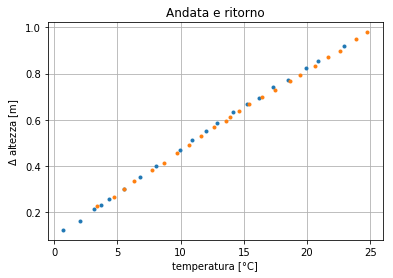

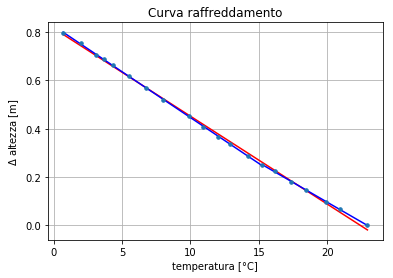

L'intercetta è (0.8165 +- 0.0002) m. 
La differenza tra altezza massima e minima è (0.7960 +- 0.0004) m.
Chi quadrato per modello e osservazioni: 9196.769464.
Studiamo se il chi quadro è nel range [6.264805, 37.156451]
Test del chi quadro non superato!


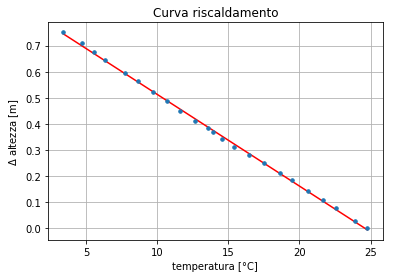

L'intercetta è (0.8653 +- 0.0002) m. 
La differenza tra altezza massima e minima è (0.7510 +- 0.0004) m.
Chi quadrato per modello e osservazioni: 5691.146093.
Studiamo se il chi quadro è nel range [8.033653, 41.401065]
Test del chi quadro non superato!


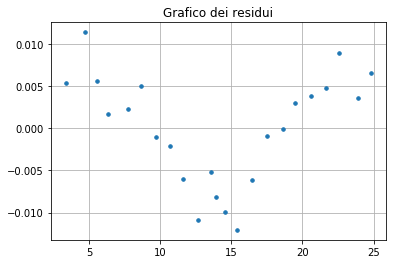

In [2]:
# Importo i dati e assegno le variabili
set3 = pd.read_csv('set3.csv')
time3 = set3['time']
hour3 = set3['hour']
temp3 = set3['temp']
height3 = set3['height']
dHeight3 = abs(height3[0] - height3)
tempris = 0.01
heightris = 0.001
temperr = tempris/np.sqrt(12)
heighterr = heightris/np.sqrt(12)

# Importo i dati e assegno le variabili
set4 = pd.read_csv('set4.csv')
time4 = set4['time']
hour4 = set4['hour']
temp4 = set4['temp']
height4 = set4['height']
dHeight4 = abs(height4.tail(1).values - height4)

# Definisco i dati da plottare sugli assi
x3 = temp3
y3 = dHeight3
x3err = temperr
y3err = np.sqrt(2 * heighterr**2)
popt3, pcov3 = curve_fit(linfunc, x3, y3)
y3m = linfunc(x3, *popt3)
popt3_1, pcov3_1 = curve_fit(linfunc, x3[:7], y3[:7])
y3_1m = linfunc(x3[:7], *popt3_1)
popt3_2, pcov3_2 = curve_fit(linfunc, x3[6:], y3[6:])
y3_2m = linfunc(x3[6:], *popt3_2)

# Definisco i dati da plottare sugli assi
x4 = temp4
y4 = dHeight4
x4err = temperr
y4err = np.sqrt(2 * heighterr**2)
popt4, pcov4 = curve_fit(linfunc, x4, y4)
y4m = linfunc(x4, *popt4)

# Grafico di andata e ritorno insieme
fig1 = plt.figure()
plt.grid()
plt.title('Andata e ritorno')
plt.errorbar(x3,height3, fmt=' ', marker='.')
plt.errorbar(x4,height4, fmt=' ', marker='.')
plt.xlabel('temperatura [°C]')
plt.ylabel('$\Delta$ altezza [m]')
plt.show()

# Figura 1.1: Curva di raffreddamento
fig1_1 = plt.figure()
plt.grid()
plt.title('Curva raffreddamento')
plt.errorbar(x3,y3,xerr=x3err,yerr=y3err, fmt=' ', marker='.', ms=7, capsize=0)
plt.plot(x3,y3m, 'r-')
plt.plot(x3[:7], y3_1m, 'b-')
plt.plot(x3[6:], y3_2m, 'b-')
plt.xlabel('temperatura [°C]')
plt.ylabel('$\Delta$ altezza [m]')
plt.show()

# Stampo a schermo l'equazione
m3 = popt3[0] # Pendenza
q3 = popt3[1] # Intercetta
lferr3 = lferr(x3,y3,y3err*np.ones(np.size(y3)))
print('L\'intercetta è (%.4f +- %.4f) m. ' % (q3, lferr3[1]))

# Stampa a schermo l'altezza massima
dMaxHeight3 = abs(height3.tail(1).values - height3.head(1).values)
dMaxHeighterr3 = np.sqrt(2 * heighterr**2)
print('La differenza tra altezza massima e minima è (%.4f +- %.4f) m.' % (dMaxHeight3, dMaxHeighterr3))

# Faccio il test del chi quadro
chiq3 = chiq(y3m, y3, y3err)
df3 = np.size(y3) - 2
testchiq(df3, 0.005, 0.995, chiq3)

# Figura 2: Grafico dei residui
r3 = -(y3m - y3)
fig2 = plt.figure()
plt.title('Grafico dei residui')
plt.grid()
plt.errorbar(x3, r3, fmt=' ', marker='.', ms=7, capsize=0)
plt.show()

# Figura 1.2: Curva di riscaldamento
fig1_2 = plt.figure()
plt.grid()
plt.title('Curva riscaldamento')
plt.errorbar(x4,y4,xerr=x4err,yerr=y4err, fmt=' ', marker='.', ms=7, capsize=0)
plt.plot(x4,y4m, 'r-')
plt.xlabel('temperatura [°C]')
plt.ylabel('$\Delta$ altezza [m]')
plt.show()

# Stampo a schermo l'equazione
m4 = popt4[0] # Pendenza
q4 = popt4[1] # Intercetta
lferr4 = lferr(x4,y4,y4err*np.ones(np.size(y4)))
print('L\'intercetta è (%.4f +- %.4f) m. ' % (q4, lferr4[1]))

# Stampa a schermo l'altezza massima
dMaxHeight4 = abs(height4.tail(1).values - height4.head(1).values)
dMaxHeighterr4 = np.sqrt(2 * heighterr**2)
print('La differenza tra altezza massima e minima è (%.4f +- %.4f) m.' % (dMaxHeight4, dMaxHeighterr4))

# Faccio il test del chi quadro
chiq4 = chiq(y4m, y4, y4err)
df4 = np.size(y4) - 2
testchiq(df4, 0.005, 0.995, chiq4)

# Figura 3: Grafico dei residui
r4 = -(y4m - y4)
fig3 = plt.figure()
plt.title('Grafico dei residui')
plt.grid()
plt.errorbar(x4, r4, fmt=' ', marker='.', ms=7, capsize=0)
plt.show()

# Estraggo i due set di dati prima e dopo il dewpoint
dewpoint4 = 14
cond4 = (x4 < dewpoint4)
ncond4 = np.logical_not(cond4)
x4_1 = np.compress(cond4,x4)
x4_2 = np.compress(ncond4,x4)

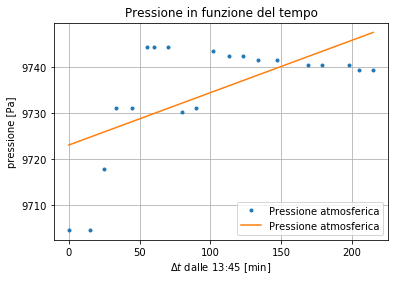

NameError: name 'popt7b' is not defined

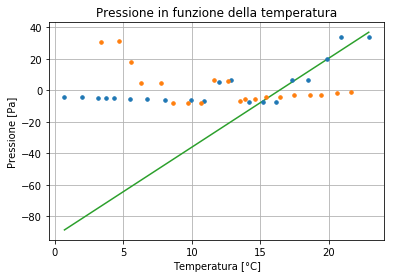

In [7]:
# Importo i dati accessori di pressione e umidità
# dhmg è in millimetri di mercurio, pres in millibar
# time in minuti
dfmeteo = pd.read_csv('pressure.csv')
hourmeteo = dfmeteo['hour']
dhmg = dfmeteo['dhmg']
presres = dfmeteo['pres']
relhum = dfmeteo['relhum']
timemeteo = dfmeteo['time']

presres = presres * mbar
dhmg = dhmg * mmhg
pres = presres + dhmg
poptpatm, pcovpatm = curve_fit(linfunc, timemeteo, pres)

pres3 = pres - rhoH2O * 1e-3 * g * y3
pres3err = y3err * rhoH2O * 1e-3 * g
pres4 = pres + rhoH2O * 1e-3 * g * y4
pres4err = y4err * rhoH2O * 1e-3 * g

# Calcolo la pressione atmosferica
fig_a = plt.figure()
plt.title('Pressione in funzione del tempo')
plt.grid()
plt.xlabel('$\Delta t$ dalle 13:45 [min]')
plt.ylabel('pressione [Pa]')
plt.plot(timemeteo, pres, '.', timemeteo, linfunc(timemeteo, *poptpatm), label='Pressione atmosferica')
#plt.plot(time3, linfunc(time3,*poptpatm) - pres3, label='Pressione dell\'andata')
#plt.plot(time4, linfunc(time4,*poptpatm) - pres4, label='Pressione del ritorno')
plt.legend()
plt.show()

popt5, pcov5 = curve_fit(linfunc, x3.append(x4), yaux5)
yaux5 = linfunc(time3.append(time4), *poptpatm)
y3a = -pres3 + linfunc(x3, *popt5)
y4a = -pres4 + linfunc(x4, *popt5)
fig6 = plt.figure()
plt.title('Pressione in funzione della temperatura')
plt.grid()
plt.xlabel('Temperatura [°C]')
plt.ylabel('Pressione [Pa]')
#plt.plot(x3.append(x4), linfunc(x3.append(x4), *popt5))
plt.errorbar(x3, y3a,xerr=x3err,yerr=pres3err, fmt=' ', marker='.', ms=7, capsize=0)
plt.errorbar(x4, y4a,xerr=x4err,yerr=pres4err, fmt=' ', marker='.', ms=7, capsize=0)
plt.plot(x3, linfunc(x3, *popt6a))
plt.plot(x4, linfunc(x4, *popt7b))
plt.show()

# Calcolo la pressione dovuta alla colonna d'acqua nel manometro deltaP = rho g h

In [1]:
# Provo a fittare i dati di quest'equazione...
def pvs(Tc):
    A = 5.40221
    B = 1838.675
    C = -31.737
    T = Tc + 273.15
    lP = A - (B/(T+C))
    P = 10**lP
    return P

xaux1 = np.array([-273.15, 13])
yaux1 = np.array([0, pvs(13)])
aux1m = (yaux1[1]-yaux1[0])/(xaux1[1]-xaux1[0])
aux1q = (xaux1[0]*yaux1[0] - xaux1[1]*yaux1[0])/(xaux1[0]-xaux1[1])

ietemps = np.arange(-5,27)
figaux1 = plt.figure()
plt.plot(ietemps,pvs(ietemps),color='#ff0000',label='Curva di Antoine per $H_2O$')
plt.axhline(y=pvs(14),label='PVS per $T_{dp}=14 °C$')
plt.fill_between(ietemps,pvs(ietemps).min(),pvs(ietemps),facecolor='red',alpha=0.25,label='vapore')
plt.fill_between(ietemps,pvs(ietemps).max(),pvs(ietemps),facecolor='blue',alpha=0.25,label='liquido')
plt.legend()
plt.xlim([-1, 25])
plt.ylim([0.005, 0.025])
plt.ylabel('Pressione [bar]')
plt.xlabel('Temperatura [°C]')
plt.grid()
plt.show()

# Per ogni x sotto il dew point, calcolo la compensazione
fcp = pvs(14) - pvs(x4_1)
fcp

NameError: name 'plt' is not defined

In [ ]:
# Faccio la correzione!
y4new = y4 + np.append(fcp,np.zeros(x4_2.size))

In [ ]:
# Suppongo un andamento lineare

interval = (75-66)/20
hygro0 = 66
hygro = []
newhygro = hygro0
for i in range(0,20):
    newhygro = newhygro + interval
    hygro.append(newhygro)

hygro

Ci sono due sistematici:

- si ipotizza che un certo volume di gas rimane a temperatura ambiente e quindi non partecipa alle trasformazioni ma è in equilibrio isostatico con il gas restante, fra 0 e 20 gradi dovrebbe essere una retta;
- A una certa temperatura abbiamo 100% di umidità dell'aria e quindi abbiamo molecole sottratte, ci sono molecole che condensano sulle pareti;